# La note d'un produit est-elle dépendente de son prix ? - Python

Pour répondre à cette question, nous avons récupérer des données sur les produits vendus sur la plateforme Amazon. 
Ces données comprennes notamment :
+ L'identifiant du produit : **product_id**
+ Le nom du produit : **product_name**
+ La catégorie du produit : **category**
+ Le prix réduit du produit : **discounted_price**
+ Le prix actuel du produit : **actual_price**
+ Le pourcentage de remise : **discount_percentage**
+ La note du produit : **rating**
+ Le nombre de notes du produit : **rating_count**
+ La description du produit : **about_product**

Dans un premier temps, nous allons procéder au nettoyage et à l'harmonisation des données.
Dans un second temps, nous analyserons les distributions des différentes variables afin de déterminer quelles analyses pourront être faites.
Enfin, nous présenterons les résultats des analyses permettant de répondre à la question posée.

## 1. Importation et nettoyage des données

### Importation des bibliothèques nécessaires

Les bibliothèques nécessaires **pandas, numpy, seaborn et matplotlib** sont nécessaires au nettoyage des données et leur analyse.

In [300]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importation des données

In [301]:
df_sales = pd.read_csv('amazon.csv')

In [302]:
df_sales.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [303]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Le jeu de données est composé de **1465** produits. Toutes les variables du jeu de données sont sous un format de **chaînes de caractères**. Il faudra prévoir la conversion de certaines variables en **float** ou **int** afin d'effectuer les analyses requisent. On note également que des **signes monétaire** se situent devant les prix des produits ainsi qu'un signe **"%"** devant le pourcentage de remise. De la même manière, il faudra hôter et convertir la variable en **variable numérique**

In [304]:
df_sales.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Il manque 2 valeurs dans la colonne correspondant au nombre de note du produit.

### Nettoyage des données

On replace ces valeurs manquantes pour des "0"

In [305]:
df_sales['rating_count'] = df_sales['rating_count'].fillna('0')

In [306]:
df_sales.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Nous retirons les signes monétaire qui se situent devant les prix des produits.

In [307]:
cols_to_modify = ['discounted_price','actual_price']
for col in cols_to_modify:
    df_sales[col] = df_sales[col].str[1:]

Nous remplacons les **","** qui se situent dans les colonnes contenant **les prix**, celle contenant le **nombre de note** et celle contenant la **note du produit** pour les remplacer par des **"."**.
Nous retirons le signe **"%"** de la colonne contenant le **pourcentage de remise** sur le produit et nous **convertissons** l'ensemble de ces variables en **variables numériques**.

In [308]:
cols_change_typ = ['discounted_price','actual_price','discount_percentage','rating','rating_count']
df_sales[cols_change_typ] = df_sales[cols_change_typ].replace({',':'.','%':''}, regex=True).apply(pd.to_numeric, errors = 'coerce')

In [309]:
df_sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1.099,64,4.2,24.269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.000,43,4.0,43.994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1.899,90,3.9,7.928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.000,53,4.2,94.363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.000,61,4.2,16.905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [310]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1460 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1418 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

La colonne **"category"** contient la catégorie principale du produit suivie des sous-catégories du produit. Ces catégories sont séparées par des **"|"**. Nous allons donc **séparer** la **catégorie principale** du produit de ses **les sous-catégories**

Certains produits contiennent jusqu'à **6 catégories**

In [311]:
df_sales.category.str.split('|', expand=True)

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


Seules la **catégorie principale** et la **première sous-catégorie** ne comportent **pas de valeurs nulles**. Nous allons donc garder uniquement ces **deux catégories**.

In [312]:
df_sales.category.str.split('|', expand=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1465 non-null   object
 1   1       1465 non-null   object
 2   2       1457 non-null   object
 3   3       1300 non-null   object
 4   4       522 non-null    object
 5   5       85 non-null     object
 6   6       13 non-null     object
dtypes: object(7)
memory usage: 80.2+ KB


In [313]:
df_sales['main_category'] = df_sales.category.str.split('|', expand=True)[[0]]
df_sales['sub_category'] = df_sales.category.str.split('|', expand=True)[[1]]

In [314]:
df_sales[['main_category','sub_category']]

,main_category,sub_category
0,Computers&Accessories,Accessories&Peripherals
1,Computers&Accessories,Accessories&Peripherals
2,Computers&Accessories,Accessories&Peripherals
3,Computers&Accessories,Accessories&Peripherals
4,Computers&Accessories,Accessories&Peripherals
...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances
1461,Home&Kitchen,Kitchen&HomeAppliances
1462,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,Home&Kitchen,"Heating,Cooling&AirQuality"


## 2. Analyses des données

Nous allons créer un **nouveau jeu de données** qui ne comprendra que les variables qui nous serviront à l'analyse.

In [315]:
df_analysis = df_sales[['product_name','main_category','sub_category','rating','actual_price','discounted_price','about_product']]

### Les distributions des variables

Nous allons étudier les **distributions** des variables et **tester** leur **normalité** afin de pouvoir choisir les **tests statistiques** adéquats pour l'analyse.

#### Distribution des notes

On observe que la distribution des notes est principalement centrée entre la note de 4 et 4,5.

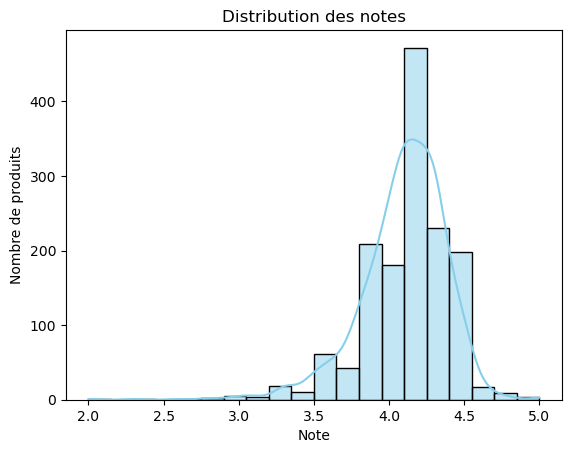

In [316]:
sns.histplot(data=df_analysis, x='rating', bins=20, kde=True, color='skyblue')
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de produits')
plt.show()

Le test de normalité **Shapiro-Wilk** est utilisé afin de déterminer si la distribution des notes suit une **loi normale**. Le résultat du test indique une **p-value = 0 < 0,05**. 
Ainsi, la **distribution des notes** ne suit pas une loi normale.

In [317]:
from scipy.stats import shapiro

stat, p = shapiro(df_analysis['rating'].dropna())
print(f"Statistique de test : {stat:.3f}, p-value : {p:.4f}")

Statistique de test : 0.925, p-value : 0.0000


Concernant la **distribution des prix**, elle non plus ne suit pas une loi normale.

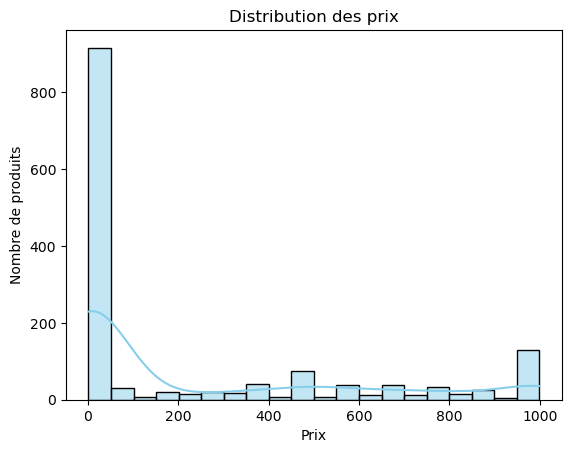

In [318]:
sns.histplot(data=df_analysis, x='actual_price', bins=20, kde=True, color='skyblue')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de produits')
plt.show()

In [319]:
stat, p = shapiro(df_analysis['actual_price'].dropna())
print(f"Statistique de test : {stat:.3f}, p-value : {p:.4f}")

Statistique de test : 0.694, p-value : 0.0000


Il en est de même pour la distribution des prix réduit.

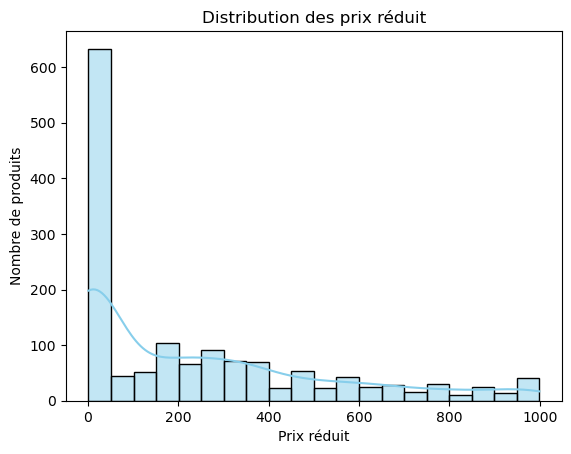

In [320]:
sns.histplot(data=df_analysis, x='discounted_price', bins=20, kde=True, color='skyblue')
plt.title('Distribution des prix réduit')
plt.xlabel('Prix réduit')
plt.ylabel('Nombre de produits')
plt.show()

In [321]:
stat, p = shapiro(df_analysis['discounted_price'].dropna())
print(f"Statistique de test : {stat:.3f}, p-value : {p:.4f}")

Statistique de test : 0.821, p-value : 0.0000


Nous voulions tester si la **longueur du nom du produit** et celle de sa **description** a un effet sur **la note** du produit. Nous avons donc créer **deux nouvelles colonnes** qui comprennent respectivement  : le **nombre de caractère du nom du produit** et le **nombre de caractère dans la description du produit**.

In [322]:
df_analysis['nbr_carac_product_name'] = df_analysis['product_name'].str.len()
df_analysis['nbr_carac_about_product'] = df_analysis['about_product'].str.len()

C:\Users\Marie GUILLAUMIN\AppData\Local\Temp\ipykernel_28020\2059083298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['nbr_carac_product_name'] = df_analysis['product_name'].str.len()
C:\Users\Marie GUILLAUMIN\AppData\Local\Temp\ipykernel_28020\2059083298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['nbr_carac_about_product'] = df_analysis['about_product'].str.len()


La distribution de ces **deux nouvelles variables** ne **suivent pas** non plus de **loi normale**.

Ainsi, nous utiliserons des **tests statistiques non paramétriques** dans la suite de l'analyse. 

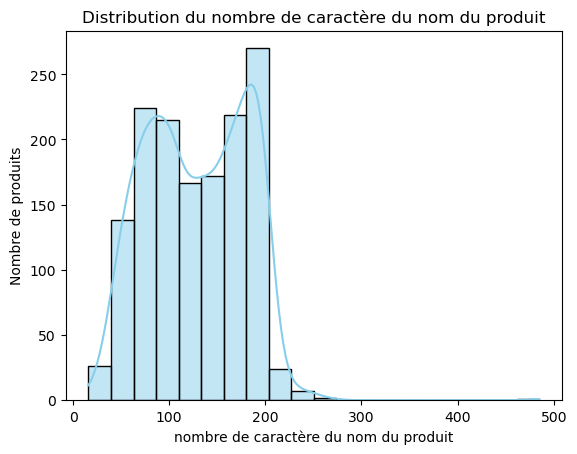

In [323]:
sns.histplot(data=df_analysis, x='nbr_carac_product_name', bins=20, kde=True, color='skyblue')
plt.title('Distribution du nombre de caractère du nom du produit')
plt.xlabel('nombre de caractère du nom du produit')
plt.ylabel('Nombre de produits')
plt.show()

In [324]:
stat, p = shapiro(df_analysis['nbr_carac_product_name'].dropna())
print(f"Statistique de test : {stat:.3f}, p-value : {p:.4f}")

Statistique de test : 0.954, p-value : 0.0000


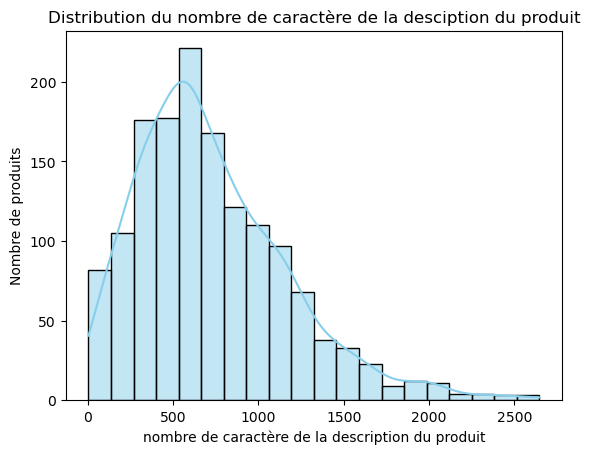

In [325]:
sns.histplot(data=df_analysis, x='nbr_carac_about_product', bins=20, kde=True, color='skyblue')
plt.title('Distribution du nombre de caractère de la desciption du produit')
plt.xlabel('nombre de caractère de la description du produit')
plt.ylabel('Nombre de produits')
plt.show()

In [326]:
stat, p = shapiro(df_analysis['nbr_carac_about_product'].dropna())
print(f"Statistique de test : {stat:.3f}, p-value : {p:.4f}")

Statistique de test : 0.942, p-value : 0.0000


### Analyse bivariée

#### Influence de la catégorie et de la sous-catégorie sur la note du produit

On obverse que les notes moyennes des produits ne sont pas les mêmes en fonction de la catégorie principale du produit. 

Les produits avec une note moyenne **la plus élevée** sont les **produits de bureau** et ceux avec la note moyenne **la plus faible** sont les produits relatifs aux **équipements de voiture et motos**.

In [327]:
df_analysis.groupby('main_category').mean(numeric_only=True).sort_values('rating', ascending=False).round(2)['rating'].to_frame()

,rating
main_category,
OfficeProducts,4.31
Toys&Games,4.30
HomeImprovement,4.25
Computers&Accessories,4.15
Electronics,4.08
Home&Kitchen,4.04
Health&PersonalCare,4.00
MusicalInstruments,3.90
Car&Motorbike,3.80


Le test de **Kruskal-Wallis** est un test statistique **non paramétrique** et indique s'il existe des **différences significatives** entre les notes moyennes en fonction des différents groupes.

En ce qui concerne les catégories principales, le test de Kruskal-Wallis nous indique qu'il existe des **différences significatives** (p-value = 0.000 < 0.05) entre les notes moyennes des différentes catégories principales des produits.

In [328]:
from scipy.stats import kruskal

categories = df_analysis.dropna().groupby('main_category')['rating'].apply(list)
h_stat, p_value = kruskal(*categories)
print(f"Statistique H : {h_stat:.3f}, p-value : {p_value:.4f}")

Statistique H : 66.661, p-value : 0.0000


Nous avons procéder de la même manière pour la sous-catégorie de produit et ici aussi nous observons des **différences significatives** (p-value = 0.000 < 0.05) entre les notes moyennes. 

Les produits avec la note moyenne la plus élevée selon la sous-catégorie sont les produits affiliés aux tablettes.

In [329]:
df_analysis.groupby('sub_category').mean(numeric_only=True).sort_values('rating', ascending=False).round(2)['rating'].to_frame()

,rating
sub_category,
Tablets,4.60
PowerAccessories,4.50
OfficeElectronics,4.45
Components,4.38
GeneralPurposeBatteries&BatteryChargers,4.35
CraftMaterials,4.34
Accessories,4.34
ExternalDevices&DataStorage,4.32
Arts&Crafts,4.30


In [338]:
categories = df_analysis.dropna().groupby('sub_category')['rating'].apply(list)
h_stat, p_value = kruskal(*categories)
print(f"Statistique H : {h_stat:.3f}, p-value : {p_value:.4f}")

Statistique H : 175.240, p-value : 0.0000


Ainsi, nous pouvons en conclure que **la catégorie** et **la sous-catégorie** du produit ont **une influence sur la note** de ce même produit.

#### Influence du prix et du prix réduit sur la note du produit

Afin de déterminer si **le prix** a une influence sur **la note** du produit, nous allons d'abord observer graphiquement comment **les notes** sont réparties en **fonction du prix** du produit.

Il semble **difficile**, graphiquement, d'identifier **une corrélation** entre **le prix** du produit et **sa note**.

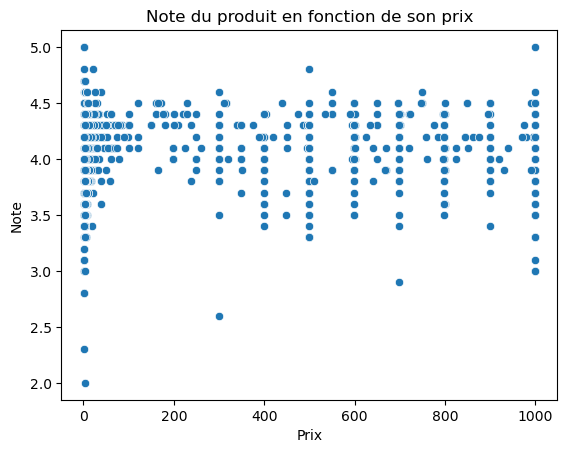

In [330]:
sns.scatterplot(data=df_analysis, x='actual_price', y='rating')
plt.title('Note du produit en fonction de son prix')
plt.xlabel('Prix')
plt.ylabel('Note')
plt.show()

Nous testons donc la corrélation de la note du produit avec son prix avec la **corrélation de Spearman**.

Le test indique que la **corrélation négative** n'est **pas significative** (p-value = 0.057 > 0.05).

In [331]:
from scipy.stats import spearmanr

df_corr = df_analysis.dropna()

corr, p_value = spearmanr(df_corr['rating'], df_corr['actual_price'])
print(f"Corrélation de Spearman : {corr:.3f}, p-value : {p_value:.4f}")

Corrélation de Spearman : -0.015, p-value : 0.5727


Nous faisons de même pour **le prix réduit** du produit. 

Graphiquement, il est également **difficile** d'identifier une potentielle **corrélation** entre les deux variables.

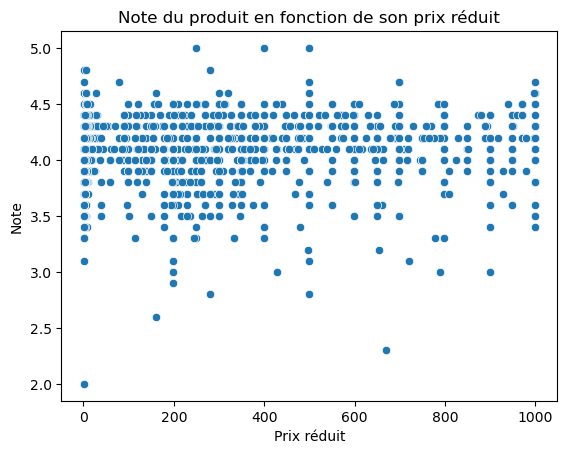

In [332]:
sns.scatterplot(data=df_analysis, x='discounted_price', y='rating')
plt.title('Note du produit en fonction de son prix réduit')
plt.xlabel('Prix réduit')
plt.ylabel('Note')
plt.show()

Ici aussi, le test indique qu'il n'y a **pas de corrélation significative** entre **la note** et le **prix réduit** du produit (p-value = 0.053 > 0.05).

In [333]:
corr, p_value = spearmanr(df_corr['rating'], df_corr['discounted_price'])
print(f"Corrélation de Spearman : {corr:.3f}, p-value : {p_value:.4f}")

Corrélation de Spearman : 0.051, p-value : 0.0533


Nous pouvons donc conclure que **le prix** et **le prix réduit** des produits **n'ont pas d'influence** sur **la note** du produit.

#### Le nombre de caractère du nom du produit et de la description du produit

De la même manière que pour le prix et le prix réduit, nous allons étudier la **relation** entre le **nombre de caractère du nom du produit** et **sa note**.

Graphiquement, on observe une **concentration** assez importante rendant difficile l'interprétation.

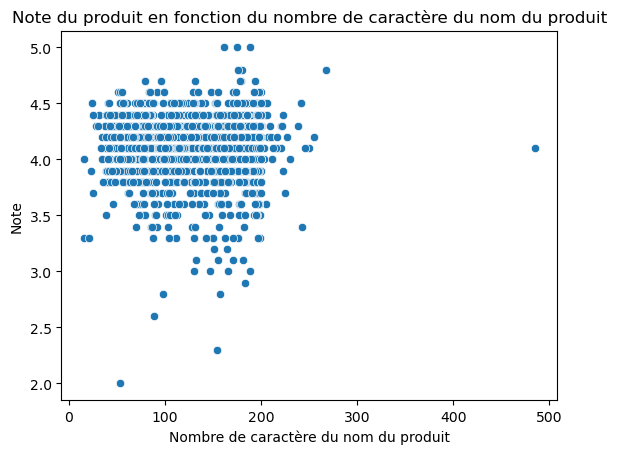

In [334]:
sns.scatterplot(data=df_analysis, x='nbr_carac_product_name', y='rating')
plt.title('Note du produit en fonction du nombre de caractère du nom du produit')
plt.xlabel('Nombre de caractère du nom du produit')
plt.ylabel('Note')
plt.show()

Le calcul de la corrélation de Spearman indique qu'il existe une **corrélation négative significative** entre le nombre de caractère du nom d'un produit et sa note.
Ainsi, il semblerait que **plus** le nom d'un produit comporte un **grand nombre de caractère**, **moins sa note est haute**.

In [335]:
corr, p_value = spearmanr(df_corr['rating'], df_corr['nbr_carac_product_name'])
print(f"Corrélation de Spearman : {corr:.3f}, p-value : {p_value:.4f}")

Corrélation de Spearman : -0.114, p-value : 0.0000


Nous avons procéder de la même manière concernant le nombre de caractère dans la description du produit.
Grpahiquement, il est également difficile d'interpréter du fait de la concentration des observations.

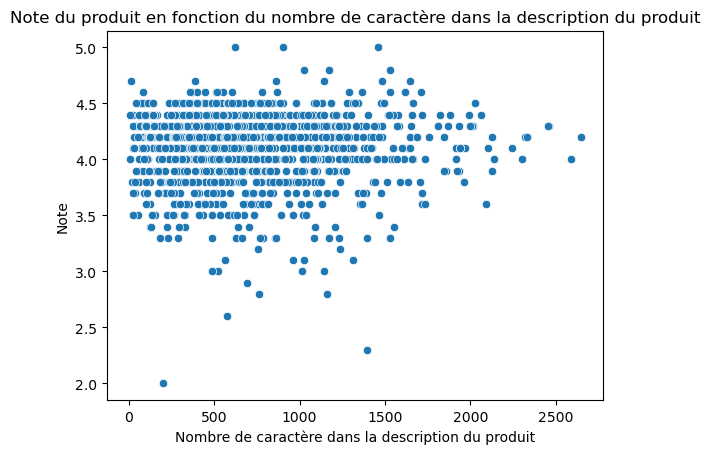

In [336]:
sns.scatterplot(data=df_analysis, x='nbr_carac_about_product', y='rating')
plt.title('Note du produit en fonction du nombre de caractère dans la description du produit')
plt.xlabel('Nombre de caractère dans la description du produit')
plt.ylabel('Note')
plt.show()

La corrélation de Spearman indique une **faible corrélation positive** mais **non significative** entre le **nombre de caractère de la description du produit** et **sa note**.
Il ne semble donc **pas avoir de lien avec ces 2 variables**.

In [337]:
corr, p_value = spearmanr(df_corr['rating'], df_corr['nbr_carac_about_product'])
print(f"Corrélation de Spearman : {corr:.3f}, p-value : {p_value:.4f}")

Corrélation de Spearman : 0.006, p-value : 0.8278


## 3.Conclusion

A travers les **différentes analyses**, nous avons pu **identifier des relations** entre **la note** d'un produit et **différentes variables**. 

Il semblerait que **la note** soit principalement **influencée** par **la catégorie** et **la sous-catégorie** du produit mais aussi par le **nom du produit**. 

Plusieurs **hypothèses** peuvent être avancées pour **expliquer** ces résultats. 
Premièrement, certaines catégories de produits peuvent être plus à même de proposer des produits de mauvaise qualité.
Ensuite, un produit avec un nom long peut être un produit de mauvaise qualité cherchant à intégrer un maximum de mots clés pour favoriser son référencement.

La **longueur** d'un nom de produit rend **l'offre peut lisible** mais a aussi une **influence négative** sur **la confiance** des consommateurs dans le produit. C'est également pour ces raisons qu'Amazon à mis à jour sa politique de titres de produits en 2025 afin de limiter les noms de produit peu lisibles et redondant.